In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

In [2]:
matches=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\matches.csv',parse_dates=['date'])
deliveries=pd.read_csv(r'C:\Users\Sourav\Desktop\Notebooks\WPL\Data\deliveries.csv')
matches.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
deliveries.replace('Delhi Daredevils','Delhi Capitals',inplace=True)
#deliveries.wide_runs.replace(0,np.nan,inplace=True)

In [147]:
matches.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [146]:
deliveries.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [5]:
dc_kxip=matches[((matches.team1=='Delhi Capitals') | (matches.team2=='Delhi Capitals')) & ((matches.team1=='Kings XI Punjab') | (matches.team2=='Kings XI Punjab'))]
dc=matches[(matches.team1=='Delhi Capitals') | (matches.team2=='Delhi Capitals')]
kxip=matches[(matches.team1=='Kings XI Punjab') | (matches.team2=='Kings XI Punjab')]
dc_kxip.shape,dc.shape,kxip.shape

((24, 18), (177, 18), (176, 18))

In [6]:
dc_kxipdeli=deliveries[((deliveries.batting_team=='Delhi Capitals') | (deliveries.bowling_team=='Delhi Capitals')) & ((deliveries.batting_team=='Kings XI Punjab') | (deliveries.bowling_team=='Kings XI Punjab'))]
dcdeli=deliveries[(deliveries.batting_team=='Delhi Capitals') | (deliveries.bowling_team=='Delhi Capitals')]
kxipdeli=deliveries[(deliveries.batting_team=='Kings XI Punjab') | (deliveries.bowling_team=='Kings XI Punjab')]
dc_kxipdeli.shape,kxipdeli.shape,dcdeli.shape

((5412, 21), (41713, 21), (41383, 21))

## Q1

In [13]:
def plot_helper(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(ncols=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],colors=['lightgreen','y'])
        ax[i].set_title(columns[i])

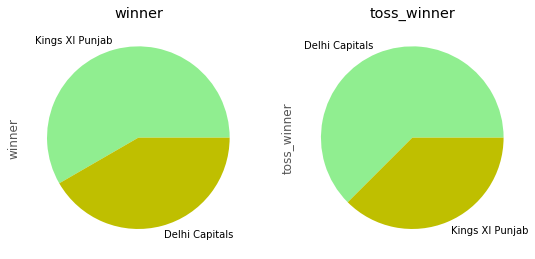

In [16]:
plot_helper(dc_kxip,['winner','toss_winner',],(9,7),'pie')

In [23]:
def plot_helper(df,columns,size,plot_type):
    length=len(columns)
    fig,ax=plt.subplots(nrows=length,figsize=size)
    for i in range(length):
        df[columns[i]].value_counts().plot(kind=plot_type,ax=ax[i],color='slateblue',alpha=0.6)
        ax[i].set_title(columns[i])

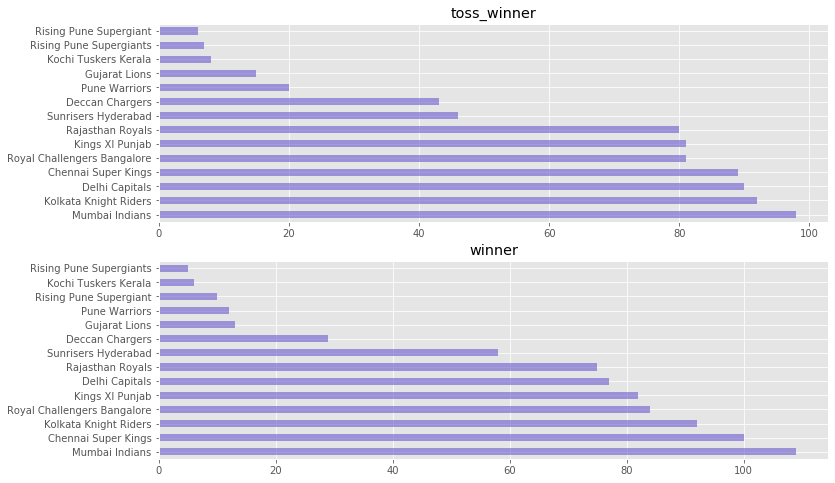

In [28]:
plot_helper(matches,['winner','toss_winner',][::-1],(12,8),'barh')

### Although the kxip has a higher edge over dc in winning the matches they will most probably lose as dc is toss winner most of the times and that is an important factor to decide the winning team

# Q2

In [91]:
kl_strike=deliveries[(deliveries.batsman.str.contains('KL Rahul')) & (deliveries.over<=6)].pivot_table(index='match_id',
                                                                                                       aggfunc=['count','sum'],
                                                                                                       values=['ball','batsman_runs'])
kl_strike.head()

count               sum             
          ball batsman_runs ball batsman_runs
match_id                                     
401         12           12   42           12
466          4            4   12            4
474         13           13   46           11
477         13           13   52           17
481          6            6   26            6

In [92]:
kl_strike=(kl_strike['sum','batsman_runs']/kl_strike['count','ball']*100)
kl_strike.describe()

count     47.000000
mean     121.201499
std       63.767111
min        0.000000
25%       88.461538
50%      115.000000
75%      157.916667
max      318.750000
dtype: float64

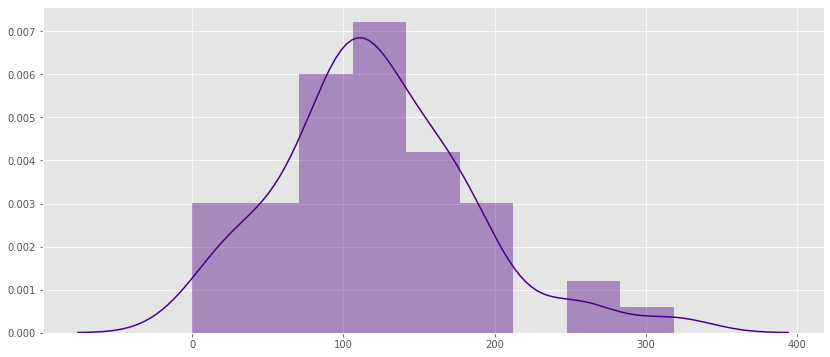

In [93]:
plt.figure(figsize=(14,6))
sns.distplot(kl_strike,color='indigo')

### This leads us to the decision that Kl Rahul's strike rate will be between 122-137 or 111-121

# Q3

In [49]:
iyer=dcdeli[dcdeli.batsman.str.contains('SS Iyer')].groupby('match_id').batsman_runs.sum()
iyer.describe()

count    61.000000
mean     28.098361
std      25.208269
min       0.000000
25%       6.000000
50%      20.000000
75%      47.000000
max      97.000000
Name: batsman_runs, dtype: float64

In [64]:
dc_runs=dcdeli[dcdeli.batting_team=='Delhi Capitals'].groupby('match_id').total_runs.sum()

dc_runs.describe()

count    177.000000
mean     152.644068
std       33.098903
min       56.000000
25%      135.000000
50%      156.000000
75%      175.000000
max      231.000000
Name: total_runs, dtype: float64

In [66]:
dckxip_runs=dc_kxipdeli[dc_kxipdeli.batting_team=='Delhi Capitals'].groupby('match_id').total_runs.sum()

dckxip_runs.describe()

count     24.000000
mean     142.458333
std       37.764694
min       58.000000
25%      118.750000
50%      145.500000
75%      165.250000
max      231.000000
Name: total_runs, dtype: float64

Text(0.5, 1.0, 'Score Distribution')

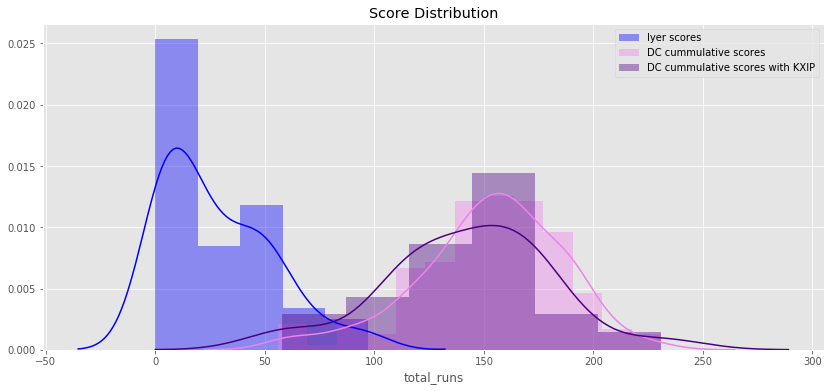

In [131]:
plt.figure(figsize=(14,6))
sns.distplot(iyer,color='blue')
sns.distplot(dc_runs,color='violet')
sns.distplot(dckxip_runs,color='indigo')
plt.legend(['Iyer scores',
            'DC cummulative scores',
            'DC cummulative scores with KXIP'])
plt.title('Score Distribution')

In [80]:
round((iyer.mean()/dc_runs.mean())*100,3),round((iyer.mean()/dckxip_runs.mean())*100,3)

(18.408, 19.724)

- As taking just the average of the case when iyer is batting for dc, and dividing it by mean runs of dc's match with other teams as well as only with kxip won't give us a good idea of iyer's contribution so we have to take a look at the contribution distibution

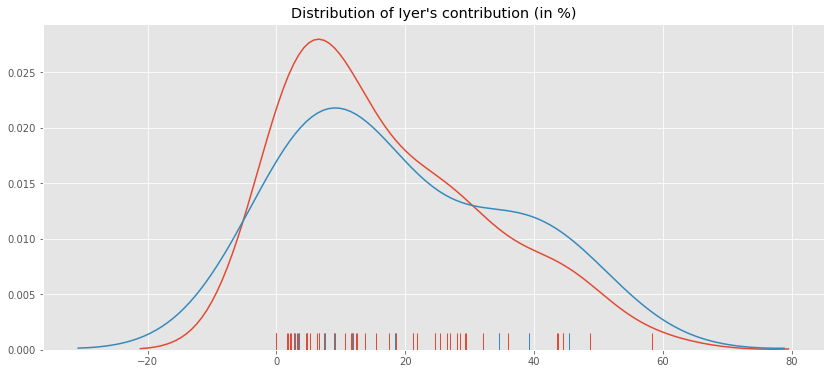

In [89]:
plt.figure(figsize=(14,6))
sns.distplot((iyer/dc_runs)*100,hist=False,rug=True)
sns.distplot((iyer/dckxip_runs)*100,hist=False,rug=True)
plt.title('Distribution of Iyer\'s contribution (in %)')
plt.show()

### From the above analysis we can conclude that iyer will contribute around 12.1-18% towards dc's total score

# Q4

In [107]:
#list(enumerate(deliveries.ball,start=1))[0][0]

1

In [127]:
kxip_wickets=kxipdeli[(kxipdeli.over>=6) & (kxipdeli.bowling_team=='Kings XI Punjab') & (kxipdeli.bowler!='Mohammed Shami')].groupby('match_id').dismissal_kind.count()
kxip_wickets.describe()

count    175.000000
mean       4.417143
std        2.160976
min        0.000000
25%        3.000000
50%        4.000000
75%        6.000000
max        9.000000
Name: dismissal_kind, dtype: float64

In [126]:
kxip_wickets_dc=dc_kxipdeli[(dc_kxipdeli.over>=6) & (dc_kxipdeli.bowling_team=='Kings XI Punjab') & (dc_kxipdeli.bowler!='Mohammed Shami')].groupby('match_id').dismissal_kind.count()
kxip_wickets_dc.describe()

count    23.000000
mean      4.956522
std       2.099313
min       1.000000
25%       4.000000
50%       5.000000
75%       6.000000
max       9.000000
Name: dismissal_kind, dtype: float64

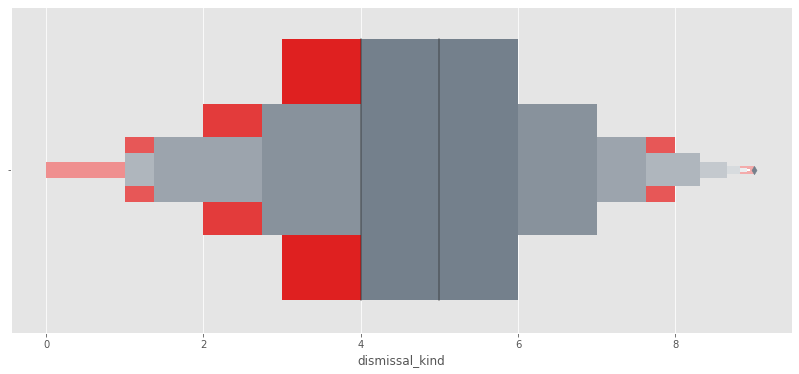

In [145]:
plt.figure(figsize=(14,6))
sns.boxenplot(kxip_wickets,color='red')
sns.boxenplot(kxip_wickets_dc,color='slategray')

### From this we can determine that although on a large scale when kxip bowlers are against any team including dc the distribution extend from 3-6 but looking at only kxip and dc matches gives us a smaller range of 4-6 with
+ Both of the distribution have a mean of above 4.4

# Q5
- Out or not out

In [161]:
gayle_status=kxipdeli[(kxipdeli.batsman=='CH Gayle') & (kxipdeli.batting_team=='Kings XI Punjab')].pivot_table(index='match_id',
                                                                                                  values='dismissal_kind',
                                                                                                  aggfunc='count')


In [162]:
gayle_status_dc=dc_kxipdeli[(dc_kxipdeli.batsman=='CH Gayle') & (dc_kxipdeli.batting_team=='Kings XI Punjab')].pivot_table(index='match_id',
                                                                                                                           values='dismissal_kind',
                                                                                                                           aggfunc='count')


In [171]:
gayle_status.describe().iloc[0:3]


,dismissal_kind
count,24.000000
mean,0.833333
std,0.380693


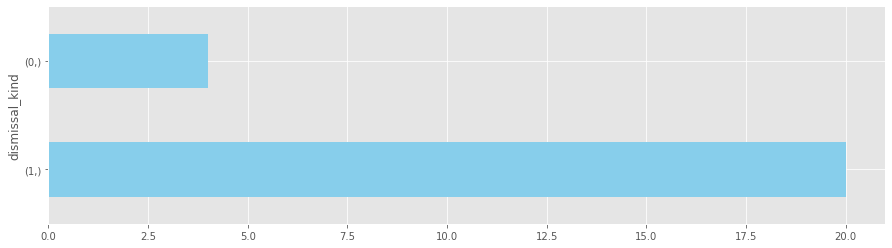

In [197]:
gayle_status.value_counts().plot.barh(color='skyblue',figsize=(15,4))


In [167]:
gayle_status_dc.describe().iloc[0:3]

,dismissal_kind
count,1.0
mean,1.0
std,NaN


### As we can see there is only one match available in the dataset in which chris played against dc as a kxip batter so, there isn't much certainty and taking other teams into consideration we can say that he will be out 

# Q5
- Strike Rate

In [198]:
gayle_strike=deliveries[deliveries.batsman=='CH Gayle'].pivot_table(index='match_id',aggfunc=['count','sum'],values=['ball','batsman_runs'])
gayle_strike.head()

count               sum             
          ball batsman_runs ball batsman_runs
match_id                                     
1           23           23   73           32
5            9            9   31            6
12          28           28  112           22
20          40           40  149           77
27          18           18   55            7

In [199]:
gayle_strike=(gayle_strike['sum','batsman_runs']/gayle_strike['count','ball']*100)
gayle_strike.describe()

count    124.000000
mean     126.912202
std       67.150182
min        0.000000
25%       85.833333
50%      126.785714
75%      172.039474
max      318.181818
dtype: float64

<function matplotlib.pyplot.title(label, fontdict=None, loc='center', pad=None, **kwargs)>

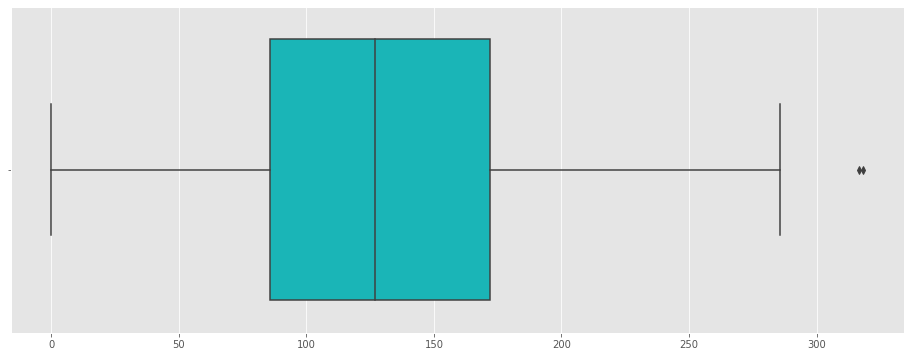

In [211]:
plt.figure(figsize=(16,6))
sns.boxplot(gayle_strike,color='DarkTurquoise')
plt.title

### This leads us to the decision that Chris Gayle's strike rate can be less or more than 130 as the mean is 126.9 with a std of 67 so, it's quite spread out 

- Considering his recent performance we can assume that the strike rate will be less than 130
